<a href="https://colab.research.google.com/github/rmontteiro/geo/blob/main/Geopandas_aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução ao Geopandas



Nesta parte do tutorial, aprenderemos os conceitos básicos de carregamento e processamento de dados geográficos usando o Geopandas. Geopandas é construído em cima das bibliotecas Pandas e Numpy. Como o Pandas Dataframe, a estrutura de dados do Geopandas contém GeodataFrame e GeoSeries. Geopandas fornece não apenas a capacidade de ler e manipular dados geográficos facilmente, mas também pode realizar muitas operações geoespaciais essenciais, incluindo, entre outras, operações geométricas e projeções que ele pega emprestado da biblioteca Shapely.

Você pode visualizar e plotar mapas com Geopandas (fornece uma interface de alto nível para a biblioteca Matplotlib) usando o método plot () em GeodataFrame / GeoSeries. Na primeira seção, aprenderemos sobre dados geográficos, coordenadas geográficas e carregamento / gravação de dados geoespaciais.

Primeiramente se faz necessário instalar algumas bibliotecas

In [3]:
%%time 

# Biblioteca importante para muitas bibliotecas geopython
!apt install gdal-bin python-gdal python3-gdal 
# Instalar rtree - requisito do Geopandas
!apt install python3-rtree 
# Instalar Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Instalar descartes - requisito de Geopandas
!pip install descartes 
# Instalar o Folium para visualização de dados geográficos
!pip install folium
# Instalar o plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-jt__8t7w
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-jt__8t7

#Objetivos de aprendizado:

Leia e escreva dados geográficos no Geopandas.
Leia arquivos csv e converta em Geopandas GeodataFrame.
Projetar e definir sistemas de referência de coordenadas (CRS).

1. Leitura de dados geográficos
Os dados geográficos (Vector) vêm em diferentes formatos (Shapefiles, Geopackage, Geojson ... etc). Carregar a maioria dos formatos de geodados com Geopandas é simples. Podemos usar:

read_file(path/to/file)

In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px

In [30]:
!git clone --recursive https://github.com/rmontteiro/geo

Cloning into 'geo'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 12 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [7]:
# Checando a pasta GDS
!ls GDS/dataset/

1-introData.zip


In [33]:
# Descompactando a base de dados
!unzip geo/1-introData.zip

Archive:  geo/1-introData.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of geo/1-introData.zip or
        geo/1-introData.zip.zip, and cannot find geo/1-introData.zip.ZIP, period.


In [34]:
# Lendo os dados

# 1. Lendo Paises --> Formato Geopackage
file = '1-introData/countries.gpkg'
countries = gpd.read_file(file)

In [35]:
countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [36]:
# Linhas e colunas dos dados dos países
countries.shape

(253, 11)

In [38]:
# Estatísticas descritivas dos dados dos países
countries.describe()

,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR
count,2.530000e+02,253.000000,2.530000e+02,253.000000,253.000000,253.000000
mean,2.927074e+07,11.462451,4.712708e+05,2000.794466,1639.592885,1991.490119
std,1.234639e+08,3.958562,1.936975e+06,178.959064,799.327438,218.598342
min,0.000000e+00,1.000000,0.000000e+00,0.000000,-99.000000,0.000000
25%,1.151200e+05,9.000000,2.851000e+03,2017.000000,2000.000000,2016.000000
50%,4.510327e+06,12.000000,3.299000e+04,2017.000000,2006.000000,2016.000000
75%,1.788524e+07,14.000000,1.890000e+05,2017.000000,2010.000000,2016.000000
max,1.379303e+09,18.000000,2.114000e+07,2017.000000,2012.000000,2016.000000


sread_file(path/to/file) --> lê os dados geográficos e retornar um GeodataFrame 

.head () -> retorna as primeiras 5 linhas. Você pode ajustar o número de linhas a serem recuperadas se quiser, por exemplo .head (8)

.shape()  -> retorna o número de linhas e colunas dos dados

In [39]:
# 2. Read Cities --> Geojson Format
cities = gpd.read_file('1-introData/cities.geojson')

In [40]:
# Explore cities data
cities.head()

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
0,Colonia del Sacramento,0.0,0,-34.479999,-57.840002,21714,21714,0,POINT (-57.84000 -34.48000)
1,Trinidad,0.0,0,-33.543999,-56.900997,21093,21093,0,POINT (-56.90100 -33.54400)
2,Fray Bentos,0.0,0,-33.138999,-58.303997,23279,23279,0,POINT (-58.30400 -33.13900)
3,Canelones,0.0,0,-34.538004,-56.284001,19698,19698,0,POINT (-56.28400 -34.53800)
4,Florida,0.0,0,-34.099002,-56.214998,32234,32234,0,POINT (-56.21500 -34.09900)


In [41]:
cities.shape

(7343, 9)

In [42]:
cities.describe()

,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other
count,7343.000000,7343.000000,7343.000000,7343.000000,7.343000e+03,7.343000e+03,7.343000e+03
mean,0.009533,0.080349,20.496166,10.987582,3.218734e+05,2.078131e+05,4.137240e+05
std,0.097177,0.271851,29.263073,79.435193,1.066623e+06,6.414873e+05,1.258383e+06
min,0.000000,0.000000,-89.982894,-179.589979,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,0.000000,0.000000,-0.674573,-64.781974,1.947850e+04,1.337000e+04,0.000000e+00
50%,0.000000,0.000000,26.640298,18.699985,6.945100e+04,5.003200e+04,3.981700e+04
75%,0.000000,0.000000,43.532008,73.292415,2.297540e+05,1.634720e+05,2.230085e+05
max,1.000000,1.000000,82.483323,179.383304,3.567600e+07,1.460851e+07,2.145995e+07


Normalmente, precisamos plotar nossos dados como um mapa. Geopandas é construído sobre Matplotlib e Descartes para visualizar mapas facilmente. Podemos usar este método para traçar um mapa facilmente,

In [43]:
#GeodataFrame.plot()

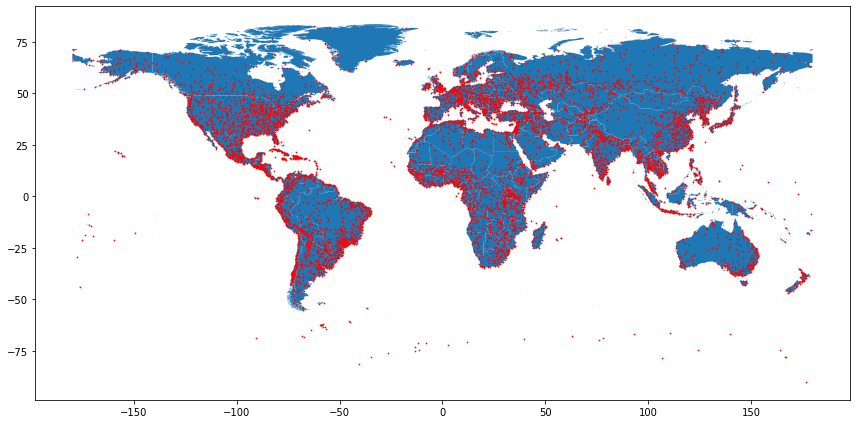

In [44]:
# Plot overlayed maps
fig, ax = plt.subplots(figsize=(12,12))
countries.plot(ax=ax)
cities.plot(markersize=0.5, color='red',ax=ax)
plt.tight_layout()
plt.savefig('overlay_map.png')
plt.show()

Exercício 1.1: Leia os dados dos rios
Exercício 1.2: Leia as primeiras 5 linhas do conjunto de dados dos rios
Exercício 1.3: Visualize o conjunto de dados dos rios.

#2. Sistemas de coordenadas e projeções
Os sistemas de referência de coordenadas representam como nossos dados bidimensionais (planares) se relacionam com os lugares reais da Terra. É a cola que mantém os atributos em seus respectivos locais. Geodataframes tem o atributo .crs que pode fornecer o CRS original usado nos dados. É fácil transformar e projetar essas coordenadas. No entanto, para realizar projeções, é necessário ter o mesmo CRS para realizar a análise geográfica e obter os valores corretos da análise. Os países, cidades e rios têm o mesmo CRS. Deixe-nos verificá-los.

In [45]:
# Data
countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [46]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

CRS diferentes têm medidas diferentes. Para alguns, as coordenadas são definidas em graus decimais, enquanto outros são definidos em metros. É um processo comum reprojetar dados de um formato para outro no processamento de dados geográficos. Esta fonte é muito útil para visualizar e comparar diferentes projeções: https://map-projections.net/compare.php?p1=mercator-84&p2=robinson&sps=1

Vamos projetar nossos dados no mercator. A projeção de Mercator, os quadrantes de latitude-longitude são alongados ao longo dos eixos X e Y conforme você se afasta do equador.

In [47]:
# Vizualizar a coluna de geometria: graus decimais
countries.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [48]:
# Projete os dados na projeção de Mercator epsg = 3395
countries_projected = countries.to_crs({'init': 'epsg:3395'})

# Veja a coluna de geometria dos países projetados
countries_projected['geometry'][:5]

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

Devido à projeção, a geometria não está mais no estilo lat / lon. É mais fácil entender a diferença nos mapas. Deixe-nos representar graficamente os países originais e os países projetados.

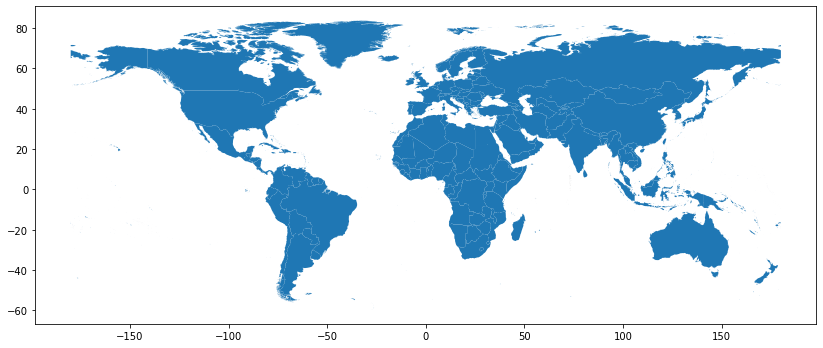

In [49]:
# Vamos representar graficamente os países não projetados e projetados
countries.plot(figsize=(14,12));
plt.savefig("wgs84.png")

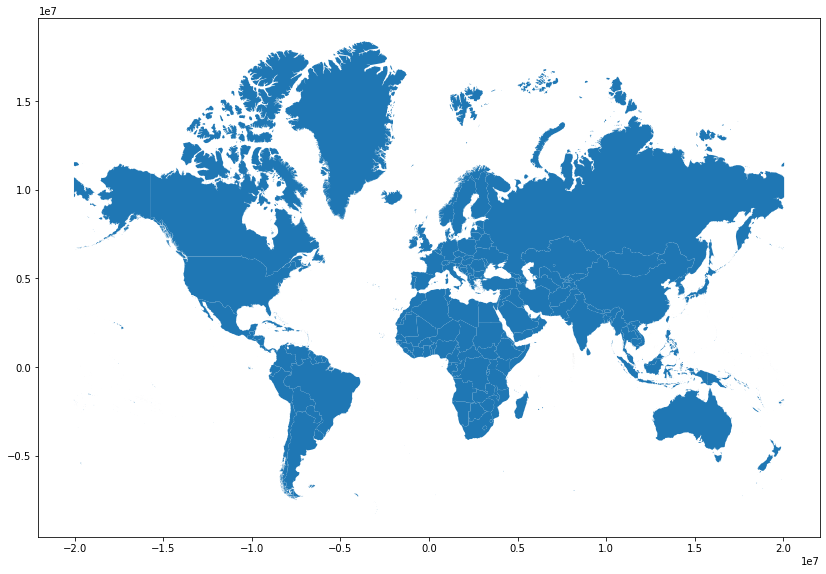

In [50]:
countries_projected.plot(figsize=(14,12));
plt.savefig("mercator.png")

Observe as diferentes escalas de X e Y em ambos os mapas. Se você tentar sobrepor os dados projetados com dados não projetados, seus dados não serão alinhados corretamente. Vamos ver se podemos representar as cidades no topo dos países projetados. Lembre-se de que não projetamos as cidades.

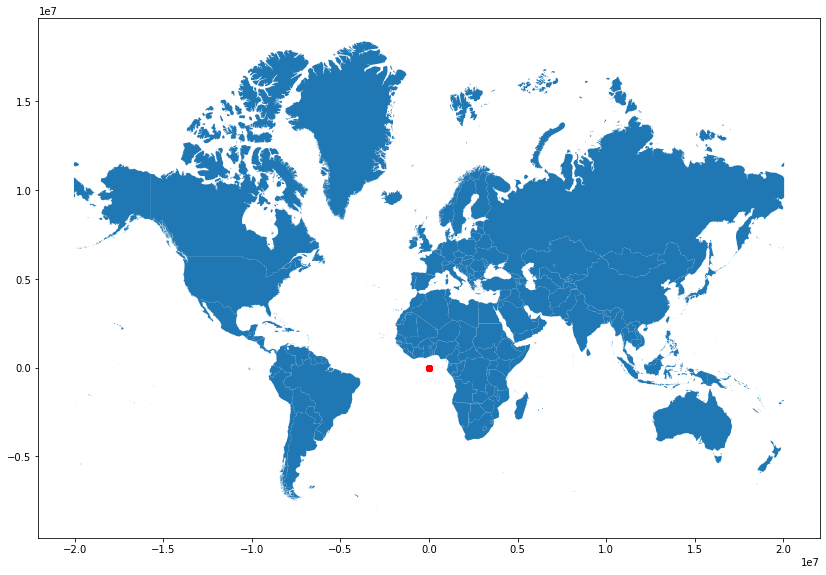

In [51]:
fig, ax = plt.subplots(figsize=(14,12))
countries_projected.plot(ax=ax)
# Cities are still in WGS84
cities.plot(ax=ax, color='red'); 
plt.savefig('overlay_unproj.png')

Exercício 2.1: Converta os dados das cidades em EPSG: 3395 e plote as cidades no topo dos países_projetados

#3. Escrever dados geográficos
Podemos facilmente salvar quaisquer novos dados criados em nosso disco local. Isso é útil quando você deseja acessar esse arquivo em outro momento sem realizar as mesmas operações novamente. Vamos salvar nossos países projetados em nosso espaço em disco. Lembre-se de que o projetamos. Portanto, caso precisemos de outra hora, vamos salvá-lo.

Geopandas possui:

In [52]:
#to_file(path/to/file + extension)

In [53]:
# Dados
countries_projected.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,"MULTIPOLYGON (((13102705.696 460777.652, 13102..."
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,"MULTIPOLYGON (((13102705.696 460777.652, 13101..."
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-7737827.685 -1967028.785, -77..."
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,"MULTIPOLYGON (((-7737827.685 -1967028.785, -77..."
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-7737827.685 -1967028.785, -77..."


In [54]:
#CRS
countries_projected.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [55]:
# Salvar países projetados
shp = '1-introData/countries_epsg3395.shp'
countries_projected.to_file(shp)

Exercício 3.1: Salve o arquivo de cidades projetadas que você criou no exercício 2.1 em um arquivo

Nesta parte do tutorial, aprenderemos como realizar tarefas de geoprocessamento em Python realizando diversas técnicas de processamento e análise de dados espaciais com Geopandas.

Objetivos de aprendizado:
Entenda GeodataFrames e Geoseries
Executar junção de tabela e junção espacial
Realizar análise de buffer e sobreposição

In [57]:
# Lendo o dado

# 1. Read Countries --> Geopackage Format
file = '1-introData/countries.gpkg'
countries = gpd.read_file(file)

# Cities: Point data
cities = gpd.read_file('1-introData/cities.geojson')

DataFrame vs. GeoDataFrame.
Um GeoDataFrame é uma estrutura de dados tabular que contém um GeoSeries.

A propriedade mais importante de um GeoDataFrame é que ele sempre tem uma coluna GeoSeries com um status especial. Este GeoSeries é conhecido como "geometria" do GeoDataFrame. Quando um método espacial é aplicado a um GeoDataFrame (ou um atributo espacial como área é chamado), este comando sempre atuará na coluna “geometria”.

Se você tiver mais de uma coluna, terá um dataFrame ou GeodataFrame. Se uma das colunas for uma coluna de geometria, ela será chamada de GeoeDataFrame. Caso contrário, é um DataFrame se alguma das colunas não for uma coluna geométrica. Da mesma forma, uma coluna significa que você tem um tipo de dados Series ou Geoseries. Se a única coluna for a coluna Geometria, ela será chamada de Geosséries. Vamos ver um exemplo de cada tipo de dados

In [58]:
# DataFrame
dataFrame = countries[['NAME', 'POP_EST']]

dataFrame.head()
type(dataFrame)

pandas.core.frame.DataFrame

In [59]:

# GeoDataFrame
geoDataFrame = countries[['geometry', 'NAME']]
geoDataFrame.head()
type(geoDataFrame)

geopandas.geodataframe.GeoDataFrame

In [60]:

# Series
series = countries['NAME']
series[:5]
type(series)

pandas.core.series.Series

In [61]:
# GeoSeries
geoSeries = countries['geometry']
geoSeries[:5]
type(geoSeries)

geopandas.geoseries.GeoSeries

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




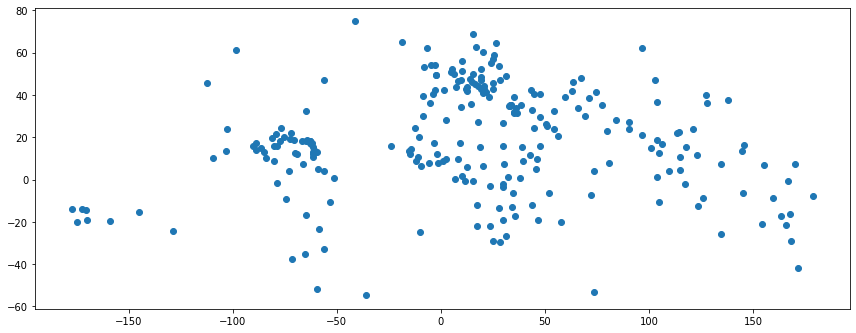

In [62]:
fig, ax = plt.subplots(figsize=(12,12))
geoDataFrame.centroid.plot(ax=ax)
plt.tight_layout()
plt.savefig('centroid.png')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




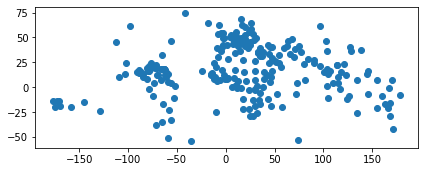

In [63]:
geoDataFrame.centroid.plot();
plt.tight_layout()
plt.savefig('centriod_plot.png')

In [64]:
geoSeries.area[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




0    153.078608
1     26.703172
2     76.761813
3     92.203587
4    106.417089
dtype: float64


##2. Junção de mesa vs. junção espacial
A junção de tabelas é uma operação de consulta clássica em que temos duas tabelas separadas, por exemplo, compartilhando uma coluna. Nesse caso, você pode realizar uma junção de tabela onde as duas tabelas são unidas usando a coluna compartilhada. Já a junção espacial relaciona-se a operações geográficas, por exemplo, unindo por localização cada cidade e seu país. Veremos os dois exemplos abaixo.

In [65]:
# To simplify let us seperate country table into two tables. 

# This table holds the geometry and country names
country_shapes = countries[['geometry', 'NAME']]
country_shapes.head()

,geometry,NAME
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile
3,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...",Bolivia
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru


In [66]:
# This table holds Country names and Population estimate
country_names = countries[['NAME', 'POP_EST']]
country_names.head()
# Notice that is not geodataframe as it does not have any geometry.
# Check its type

,NAME,POP_EST
0,Indonesia,260580739
1,Malaysia,31381992
2,Chile,17789267
3,Bolivia,11138234
4,Peru,31036656


Podemos juntar / mesclar as duas tabelas com base em sua coluna compartilhada NOME. Esta é uma operação pura do pandas e não envolve quaisquer operações geográficas.

In [67]:
# Merge country_shapes to country names on ISO_A3 Column. 
country_merged = country_shapes.merge(country_names, on='NAME', how='left')
country_merged.head()

,geometry,NAME,POP_EST
0,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,260580739
1,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,31381992
2,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,17789267
3,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...",Bolivia,11138234
4,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,31036656


Spatial Join

In [68]:
# This gdf holds the geometry and country names
country_names = countries[['geometry', 'NAME']]

# This gdf holds the geometry and city names
cities_names = cities[['name', 'geometry']]

Faremos um exemplo de junção espacial. Queremos juntar as duas tabelas com base em suas localizações. Por exemplo, qual país contém qual cidade ou qual cidade está dentro de qual país. Usaremos a função Geopandas.

sjoin ()
para fazer a junção espacial.

In [69]:
# Merge city names and country names
cities_with_country = gpd.sjoin(cities_names, country_names, how="inner", op='within')
cities_with_country.sample(5)

,name,geometry,index_right,NAME
3005,Isikul,POINT (71.26825 54.92870),48,Russia
7322,Cape Town,POINT (18.43304 -33.91807),37,South Africa
6542,Roseau,POINT (-61.38701 15.30102),198,Dominica
5853,Xuanzhou,POINT (118.75333 30.95445),9,China
2313,Nakhon Phanom,POINT (104.76946 17.39448),110,Thailand


Cada cidade é comparada com seu país correspondente com base na localização. Usamos op = dentro do qual obtém pontos da cidade que estão dentro do polígono de um país. Aqui também podemos usar intersect. Além disso, poderíamos usar op = contain e descobrir quais países contêm os pontos da cidade.

##3. Análise de buffer
A análise de buffer é uma tarefa importante de geoprocessamento. É amplamente utilizado em muitos domínios para obter uma distância em torno de um ponto. Neste exemplo, primeiro obteremos uma cidade na Suécia e, em seguida, faremos um buffer em torno dela. Uma coisa complicada aqui é que você precisa saber qual CRS / projeção está usando para obter a saída correta desejada. Se os seus dados não forem projetados na projeção em que os medidores são usados, a saída não será em metros. Este é um erro clássico no mundo da Geodata. Usei este recurso para descobrir qual crs sweden tem em metros: http://spatialreference.org/ref/epsg/sweref99-tm/

In [70]:

# Find out stockholm from the cities
stocholm = cities[cities.name == 'Stockholm']
stocholm = stocholm.to_crs({'init': 'epsg:3006'})
stocholm

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:68: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
7287,Stockholm,1.0,1,59.35076,18.097335,1264000,1253309,0,POINT (675974.010 6583418.116)


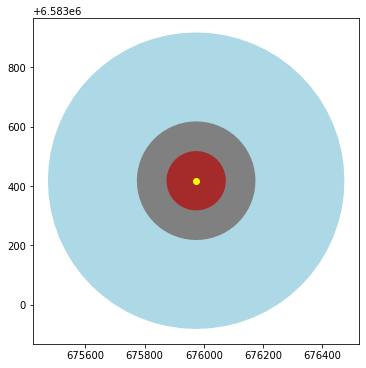

In [71]:

# Let us create a buffer of 500, 200, 100 meters and plot them
stocholm_100 = stocholm.buffer(100)
stocholm_200 = stocholm.buffer(200)
stocholm_500 = stocholm.buffer(500)
fig, ax = plt.subplots(figsize=(8,6))

stocholm_500.plot(ax=ax, color='lightblue')
stocholm_200.plot(ax=ax, color='gray')
stocholm_100.plot(ax=ax, color='brown')
stocholm.plot(ax=ax, color='Yellow');
plt.savefig('buffer.png')

##4. Sobreposição
Às vezes, precisamos criar novos recursos a partir de diferentes tipos de dados, como pontos, linhas e polígonos. Operações de definição ou sobreposições desempenham um papel importante aqui. Estaremos usando o mesmo conjunto de dados, mas em vez de lê-lo nas pastas da nossa mesa, podemos usar o mecanismo de leitura de conjunto de dados embutido no Geopandas. Este exemplo vem da documentação do Geopandas.

In [72]:
# Let us see what data is available in Geopandas
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [73]:
# Read from the geopandas dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

#capitals.head()
#capitals.plot()

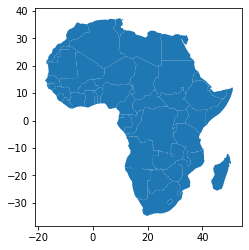

In [74]:
# Select Africa
africa = world[world['continent'] == "Africa"]
africa = africa[['geometry', 'name']]

#africa.shape
africa.plot();
plt.savefig('africa.png')

In [75]:
# Project to crs that uses meters as distance measure
africa = africa.to_crs('+init=epsg:3395')
capitals = capitals.to_crs('+init=epsg:3395')

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:292: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Para ilustrar a função de sobreposição, considere o seguinte caso em que se deseja identificar a porção “central” de cada país - definida como áreas dentro de 500km de uma capital - usando um GeoDataFrame da África e um GeoDataFrame de capitais.

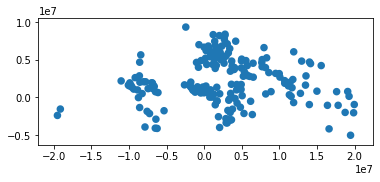

In [76]:
# make 500km buffer
capitals['geometry']= capitals.buffer(500000)
capitals.plot();

Para selecionar apenas a parte dos países dentro de 500 km de uma capital, especificamos a opção como ser “interseção”, o que cria um novo conjunto de polígonos onde essas duas camadas se sobrepõem:

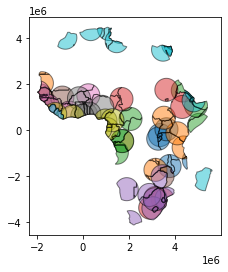

In [77]:

africa_cores = gpd.overlay(africa, capitals, how='intersection')
africa_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10');

Alterar a opção “como” permite diferentes tipos de operações de sobreposição. Por exemplo, se estivéssemos interessados ​​nas porções de países distantes das capitais (as periferias), calcularíamos a diferença entre os dois.

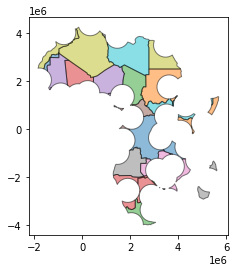

In [78]:
africa_peripheries = gpd.overlay(africa, capitals, how='difference')

africa_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10');

###FIM